## Problem Statement

To identify indicators/ features from the Ames Housing dataset which predict the sale price of housing in Ames Iowa. This information will help buyers and investors to find the best houses based on their preferences and needs.  It will also help sellers to identify ways to increase their house's selling price. Linear regression models with and without regularization such as Lasso, Ridge and ElasticNet will be used to model the data and R squared and Root Mean Square Error will be used to evaluate and find the best model for production and prediction.

The predicted sale price based on the data from Kaggle will be submitted to the DSI Kaggle competition to evaluate the effectiveness of the model on unseen data.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
housing = pd.read_csv('../datasets/train.csv',index_col='Id') 

In [3]:
housing_test =pd.read_csv('../datasets/test.csv',index_col='Id')

In [30]:
# to display all rows and columns for analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
housing.describe()

,PID,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Yr Sold,SalePrice,BedroomA bvGr
count,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.944417,10065.208191,1.996587,3.595807,3.998537,2.947343,6.112140,5.562165,1971.708922,1984.190151,98.626524,3.406143,3.085812,3.490005,2.929303,0.657240,442.084837,47.935641,567.451487,1057.471965,4.158459,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,3.517309,6.435885,7.843003,0.590931,1.763530,1976.707947,1.775719,473.440761,2.803023,2.810336,1.833740,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,0.010726,51.574354,2007.775719,181469.701609,2.843491
std,1.886918e+08,33.137332,6742.488909,0.058335,0.566514,0.049365,0.244264,1.426271,1.104497,30.177889,21.036250,174.324690,0.587962,0.372792,0.901637,0.572009,1.049051,461.195041,164.964052,445.022846,449.908003,0.964112,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,0.665577,1.560225,0.683409,0.638516,1.807074,27.088978,0.765357,216.135102,0.721253,0.716094,0.534792,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,0.173576,573.393985,1.312014,79258.659352,0.826618
min,5.263011e+08,0.000000,1300.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000,0.000000
25%,5.284581e+08,43.500000,7500.000000,2.000000,3.000000,4.000000,3.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,220.000000,793.000000,3.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1959.000000,1.000000,319.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129825.000000,2.000000
50%,5.354532e+08,63.000000,9430.000000,2.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,0.000000,368.000000,0.000000,474.000000,994.000000,5.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,8.000000,1.000000,1.000000,1978.000000,2.000000,480.000000,3.000000,3.000000,2.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000,3.000000
75%,9.071801e+08,78.000000,11513.500000,2.000000,4.000000,4.

In [5]:
# Check for nulls
housing.isnull().sum().sort_values(ascending= False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

There are alot of null values. The null values will be analysed to determine the best way to either encode or remove them.

In [6]:
# Check column data types

housing.dtypes

PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
B

There are some nominal columns that should be categorical such as Year Built

In [7]:
#Encoding NaN with appropriate values
housing.loc[:, "Alley"] = housing.loc[:, "Alley"].fillna("None")

housing.loc[:, "BedroomA bvGr"] = housing.loc[:, "Bedroom AbvGr"].fillna(0)

housing.loc[:, "Bsmt Qual"] = housing.loc[:, "Bsmt Qual"].fillna("No")
housing.loc[:, "Bsmt Cond"] = housing.loc[:, "Bsmt Cond"].fillna("No")
housing.loc[:, "Bsmt Exposure"] = housing.loc[:, "Bsmt Exposure"].fillna("No")
housing.loc[:, "BsmtFin Type 1"] = housing.loc[:, "BsmtFin Type 1"].fillna("No")
housing.loc[:, "BsmtFin Type 2"] = housing.loc[:, "BsmtFin Type 2"].fillna("No")
housing.loc[:, "Bsmt Full Bath"] = housing.loc[:, "Bsmt Full Bath"].fillna(0)
housing.loc[:, "Bsmt Half Bath"] = housing.loc[:, "Bsmt Half Bath"].fillna(0)
housing.loc[:, "Bsmt Unf SF"] = housing.loc[:, "Bsmt Unf SF"].fillna(0)

housing.loc[:, "Central Air"] = housing.loc[:, "Central Air"].fillna("N")

housing.loc[:, "Condition 1"] = housing.loc[:, "Condition 1"].fillna("Norm")
housing.loc[:, "Condition 2"] = housing.loc[:, "Condition 2"].fillna("Norm")

housing.loc[:, "Enclosed Porch"] = housing.loc[:, "Enclosed Porch"].fillna(0)

housing.loc[:, "Exter Cond"] = housing.loc[:, "Exter Cond"].fillna("TA")
housing.loc[:, "Exter Qual"] = housing.loc[:, "Exter Qual"].fillna("TA")

housing.loc[:, "Fence"] = housing.loc[:, "Fence"].fillna("No")

housing.loc[:, "Fireplace Qu"] = housing.loc[:, "Fireplace Qu"].fillna("No")
housing.loc[:, "Fireplaces"] = housing.loc[:, "Fireplaces"].fillna(0)

housing.loc[:, "Functional"] = housing.loc[:, "Functional"].fillna("Typ")

housing.loc[:, "Garage Type"] = housing.loc[:, "Garage Type"].fillna("No")
housing.loc[:, "Garage Finish"] = housing.loc[:, "Garage Finish"].fillna("No")
housing.loc[:, "Garage Qual"] = housing.loc[:, "Garage Qual"].fillna("No")
housing.loc[:, "Garage Cond"] = housing.loc[:, "Garage Cond"].fillna("No")
housing.loc[:, "Garage Area"] = housing.loc[:, "Garage Area"].fillna(0)
housing.loc[:, "Garage Cars"] = housing.loc[:, "Garage Cars"].fillna(0)

housing.loc[:, "Half Bath"] = housing.loc[:, "Half Bath"].fillna(0)

housing.loc[:, "Heating QC"] = housing.loc[:, "Heating QC"].fillna("TA")

housing.loc[:, "Kitchen AbvGr"] = housing.loc[:, "Kitchen AbvGr"].fillna(0)

housing.loc[:, "Kitchen Qual"] = housing.loc[:, "Kitchen Qual"].fillna("TA")

housing.loc[:, "Lot Frontage"] = housing.loc[:, "Lot Frontage"].fillna(0)

housing.loc[:, "Lot Shape"] = housing.loc[:, "Lot Shape"].fillna("Reg")

housing.loc[:, "Mas Vnr Type"] = housing.loc[:, "Mas Vnr Type"].fillna("None")
housing.loc[:, "Mas Vnr Area"] = housing.loc[:, "Mas Vnr Area"].fillna(0)

housing.loc[:, "Misc Feature"] = housing.loc[:, "Misc Feature"].fillna("No")
housing.loc[:, "Misc Val"] = housing.loc[:, "Misc Val"].fillna(0)

housing.loc[:, "Open Porch SF"] = housing.loc[:, "Open Porch SF"].fillna(0)

housing.loc[:, "Paved Drive"] = housing.loc[:, "Paved Drive"].fillna("N")

housing.loc[:, "Pool QC"] = housing.loc[:, "Pool QC"].fillna("No")
housing.loc[:, "Pool Area"] = housing.loc[:, "Pool Area"].fillna(0)

housing.loc[:, "Overall Cond"] = housing.loc[:, "Overall Cond"].fillna("Normal")

housing.loc[:, "Screen Porch"] = housing.loc[:, "Screen Porch"].fillna(0)

housing.loc[:, "TotRms AbvGrd"] = housing.loc[:, "TotRms AbvGrd"].fillna(0)

housing.loc[:, "Utilities"] = housing.loc[:, "Utilities"].fillna("AllPub")

housing.loc[:, "Total Bsmt SF"] = housing.loc[:, "Total Bsmt SF"].fillna(0)
housing.loc[:, "BsmtFin SF 2"] = housing.loc[:, "BsmtFin SF 2"].fillna(0)
housing.loc[:, "BsmtFin SF 1"] = housing.loc[:, "BsmtFin SF 1"].fillna(0)

In [8]:
housing_test.loc[:, "Alley"] = housing_test.loc[:, "Alley"].fillna("None")

housing_test.loc[:, "BedroomA bvGr"] = housing_test.loc[:, "Bedroom AbvGr"].fillna(0)

housing_test.loc[:, "Bsmt Qual"] = housing_test.loc[:, "Bsmt Qual"].fillna("No")
housing_test.loc[:, "Bsmt Cond"] = housing_test.loc[:, "Bsmt Cond"].fillna("No")
housing_test.loc[:, "Bsmt Exposure"] = housing_test.loc[:, "Bsmt Exposure"].fillna("No")
housing_test.loc[:, "BsmtFin Type 1"] = housing_test.loc[:, "BsmtFin Type 1"].fillna("No")
housing_test.loc[:, "BsmtFin Type 2"] = housing_test.loc[:, "BsmtFin Type 2"].fillna("No")
housing_test.loc[:, "Bsmt Full Bath"] = housing_test.loc[:, "Bsmt Full Bath"].fillna(0)
housing_test.loc[:, "Bsmt Half Bath"] = housing_test.loc[:, "Bsmt Half Bath"].fillna(0)
housing_test.loc[:, "Bsmt Unf SF"] = housing_test.loc[:, "Bsmt Unf SF"].fillna(0)

housing_test.loc[:, "Central Air"] = housing_test.loc[:, "Central Air"].fillna("N")

housing_test.loc[:, "Condition 1"] = housing_test.loc[:, "Condition 1"].fillna("Norm")
housing_test.loc[:, "Condition 2"] = housing_test.loc[:, "Condition 2"].fillna("Norm")

housing_test.loc[:, "Enclosed Porch"] = housing_test.loc[:, "Enclosed Porch"].fillna(0)

housing_test.loc[:, "Exter Cond"] = housing_test.loc[:, "Exter Cond"].fillna("TA")
housing_test.loc[:, "Exter Qual"] = housing_test.loc[:, "Exter Qual"].fillna("TA")

housing_test.loc[:, "Fence"] = housing_test.loc[:, "Fence"].fillna("No")

housing_test.loc[:, "Fireplace Qu"] = housing_test.loc[:, "Fireplace Qu"].fillna("No")
housing_test.loc[:, "Fireplaces"] = housing_test.loc[:, "Fireplaces"].fillna(0)

housing_test.loc[:, "Functional"] = housing_test.loc[:, "Functional"].fillna("Typ")

housing_test.loc[:, "Garage Type"] = housing_test.loc[:, "Garage Type"].fillna("No")
housing_test.loc[:, "Garage Finish"] = housing_test.loc[:, "Garage Finish"].fillna("No")
housing_test.loc[:, "Garage Qual"] = housing_test.loc[:, "Garage Qual"].fillna("No")
housing_test.loc[:, "Garage Cond"] = housing_test.loc[:, "Garage Cond"].fillna("No")
housing_test.loc[:, "Garage Area"] = housing_test.loc[:, "Garage Area"].fillna(0)
housing_test.loc[:, "Garage Cars"] = housing_test.loc[:, "Garage Cars"].fillna(0)

housing_test.loc[:, "Half Bath"] = housing_test.loc[:, "Half Bath"].fillna(0)

housing_test.loc[:, "Heating QC"] = housing_test.loc[:, "Heating QC"].fillna("TA")

housing_test.loc[:, "Kitchen AbvGr"] = housing_test.loc[:, "Kitchen AbvGr"].fillna(0)

housing_test.loc[:, "Kitchen Qual"] = housing_test.loc[:, "Kitchen Qual"].fillna("TA")

housing_test.loc[:, "Lot Frontage"] = housing_test.loc[:, "Lot Frontage"].fillna(0)

housing_test.loc[:, "Lot Shape"] = housing_test.loc[:, "Lot Shape"].fillna("Reg")

housing_test.loc[:, "Mas Vnr Type"] = housing_test.loc[:, "Mas Vnr Type"].fillna("None")
housing_test.loc[:, "Mas Vnr Area"] = housing_test.loc[:, "Mas Vnr Area"].fillna(0)

housing_test.loc[:, "Misc Feature"] = housing_test.loc[:, "Misc Feature"].fillna("No")
housing_test.loc[:, "Misc Val"] = housing_test.loc[:, "Misc Val"].fillna(0)

housing_test.loc[:, "Open Porch SF"] = housing_test.loc[:, "Open Porch SF"].fillna(0)

housing_test.loc[:, "Paved Drive"] = housing_test.loc[:, "Paved Drive"].fillna("N")

housing_test.loc[:, "Pool QC"] = housing_test.loc[:, "Pool QC"].fillna("No")
housing_test.loc[:, "Pool Area"] = housing_test.loc[:, "Pool Area"].fillna(0)

housing_test.loc[:, "Overall Cond"] = housing_test.loc[:, "Overall Cond"].fillna("Normal")

housing_test.loc[:, "Screen Porch"] = housing_test.loc[:, "Screen Porch"].fillna(0)

housing_test.loc[:, "TotRms AbvGrd"] = housing_test.loc[:, "TotRms AbvGrd"].fillna(0)

housing_test.loc[:, "Utilities"] = housing_test.loc[:, "Utilities"].fillna("AllPub")

housing_test.loc[:, "Total Bsmt SF"] = housing_test.loc[:, "Total Bsmt SF"].fillna(0)
housing_test.loc[:, "BsmtFin SF 2"] = housing_test.loc[:, "BsmtFin SF 2"].fillna(0)
housing_test.loc[:, "BsmtFin SF 1"] = housing_test.loc[:, "BsmtFin SF 1"].fillna(0)

In [9]:
# Encoding missing Garage Year Built years with the Year that the house was built

housing['Garage Yr Blt'] = housing.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [10]:
housing_test['Garage Yr Blt'] = housing_test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [13]:
#Encoding with appropriate values
housing = housing.replace({"MS SubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "Mo Sold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [14]:
#Encoding with appropriate values
housing = housing.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "Bsmt Cond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Bsmt Exposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFin Type1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFin Type2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "Bsmt Qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fireplace Qu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "Garage Cond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Qual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Pool QC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                     )

In [15]:
housing.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

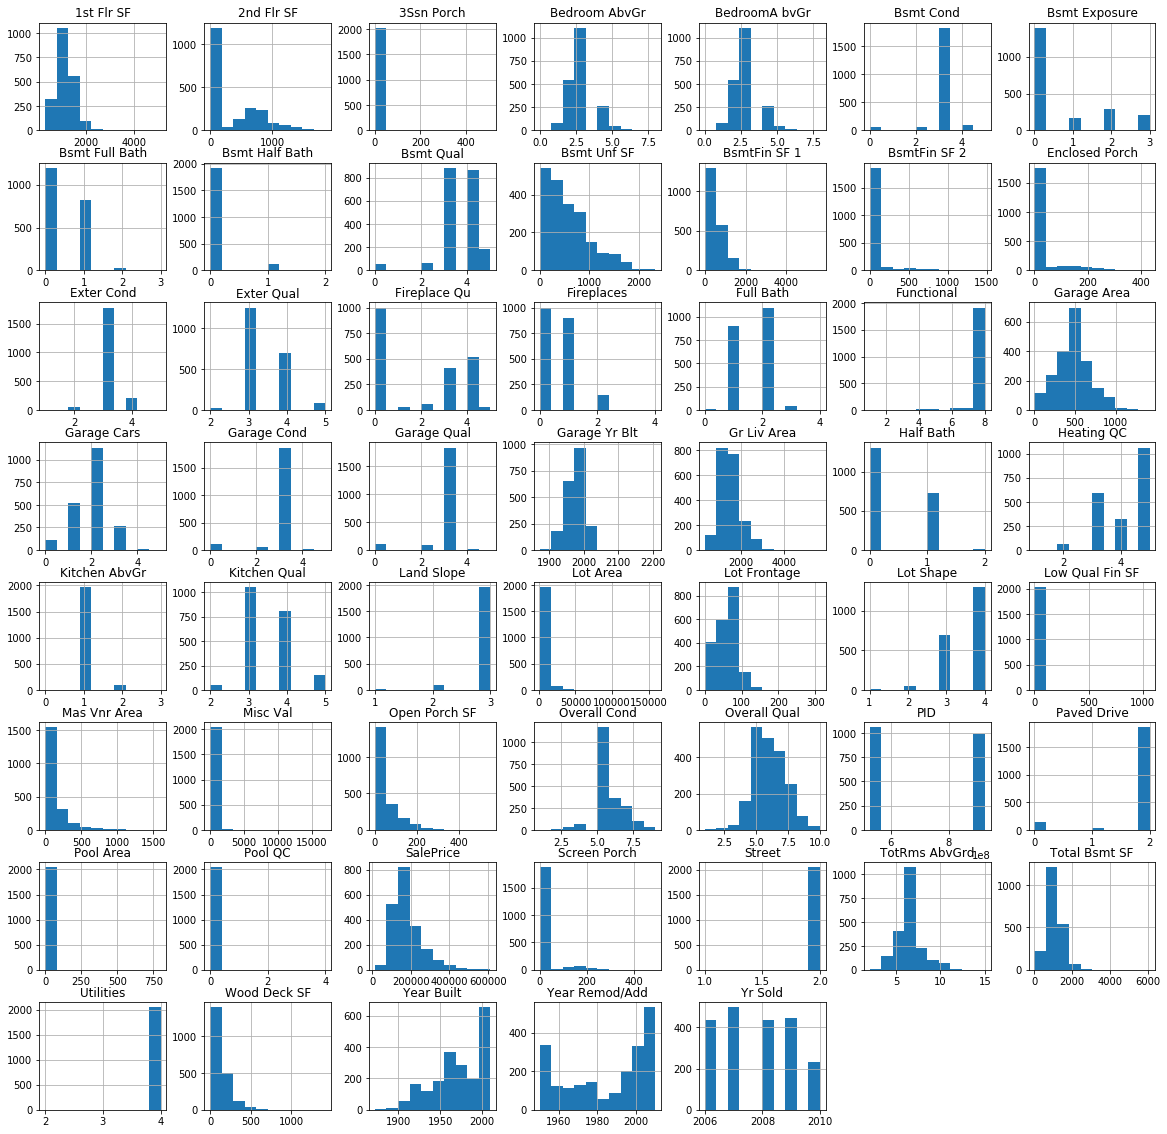

In [16]:
#Quick analysis of the data using the numerical features
housing.hist(figsize=(20, 20));

Significant points from the histogram:

1) There are alot of houses that are built and renovated in the within the past 20 years

2) There has been a drop in houses sold after 2008

3) Most area related features are right skewed, indicating a preference for smaller houses. 
This could also be due to smaller houses commanding lower sale price.

4) Generally most houses are in the middle in terms of quality and conditions

5) Generally most houses have the median number of interior features such as bedrooms or bathrooms

6) The sale price is right skewed indicating extreme outliers. Also indicating a preference for cheaper houses

## Grouping features into the following features: age, conditions, location, size, housing interior, housing exterior, area features and misc


age related features= housing[['Year Built','Mo Sold','Yr Sold','Year Remod/Add','Garage Yr Blt']]

condtions related features =housing[['Overall Qual', 'Overall Cond','Exter Qual', 'Exter Cond','Functional']]

location related featurest =housing[['MS Zoning','Neighborhood','Condition 1','Condition 2']]

size related featurest=housing[['MS SubClass','Lot Frontage','Lot Area','Bldg Type','Bsmt Qual', 'BsmtFin SF 1', 'BsmtFin SF 2',
'Bsmt Unf SF','Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF', 
'Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch', 'Pool Area']]

interior related features =housing[['Utilities','Electrical','Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating', 
'Heating QC', 'Central Air','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath','Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
'Fireplaces', 'Fireplace Qu','Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond']]

exterior related features=housing[['Lot Shape','Lot Config','House Style','Roof Style', 'Roof Matl','Exterior 1st', 
'Exterior 2nd','Mas Vnr Type', 'Mas Vnr Area','Foundation','Paved Drive', 'Pool QC', 'Fence', 'Misc Feature','Misc Val']]

area related features=housing[['Street','Alley','Land Contour','Land Slope']]

misc related features =housing[['Sale Type']]

### Analysis of a sample of features from each group

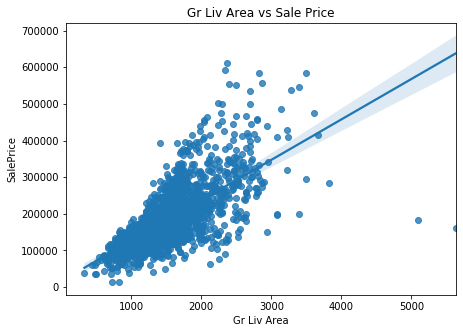

In [18]:
#Analysis of size feature

plt.figure(figsize=(7,5))
sns.regplot(housing['Gr Liv Area'] ,housing['SalePrice']).set_title("Gr Liv Area vs Sale Price");


There are 2 extreme outliers for ground living area above 4000 sq ft. This is also stated in this reference: 

There is also alot of variance above 2400 sq ft

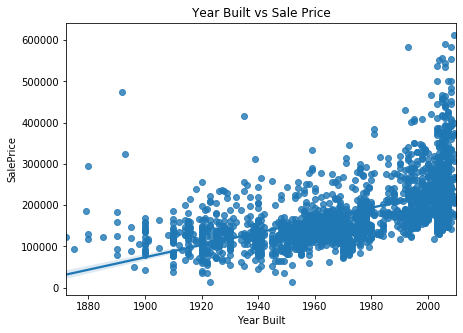

In [19]:
# Analysis of age feature
plt.figure(figsize=(7,5))
sns.regplot(housing['Year Built'] ,housing['SalePrice']).set_title("Year Built vs Sale Price");

There is a positive correlation between the year built and sale price. 

The scatterplot also indicates more houses built from year 2000 are selling at higher prices than previous years

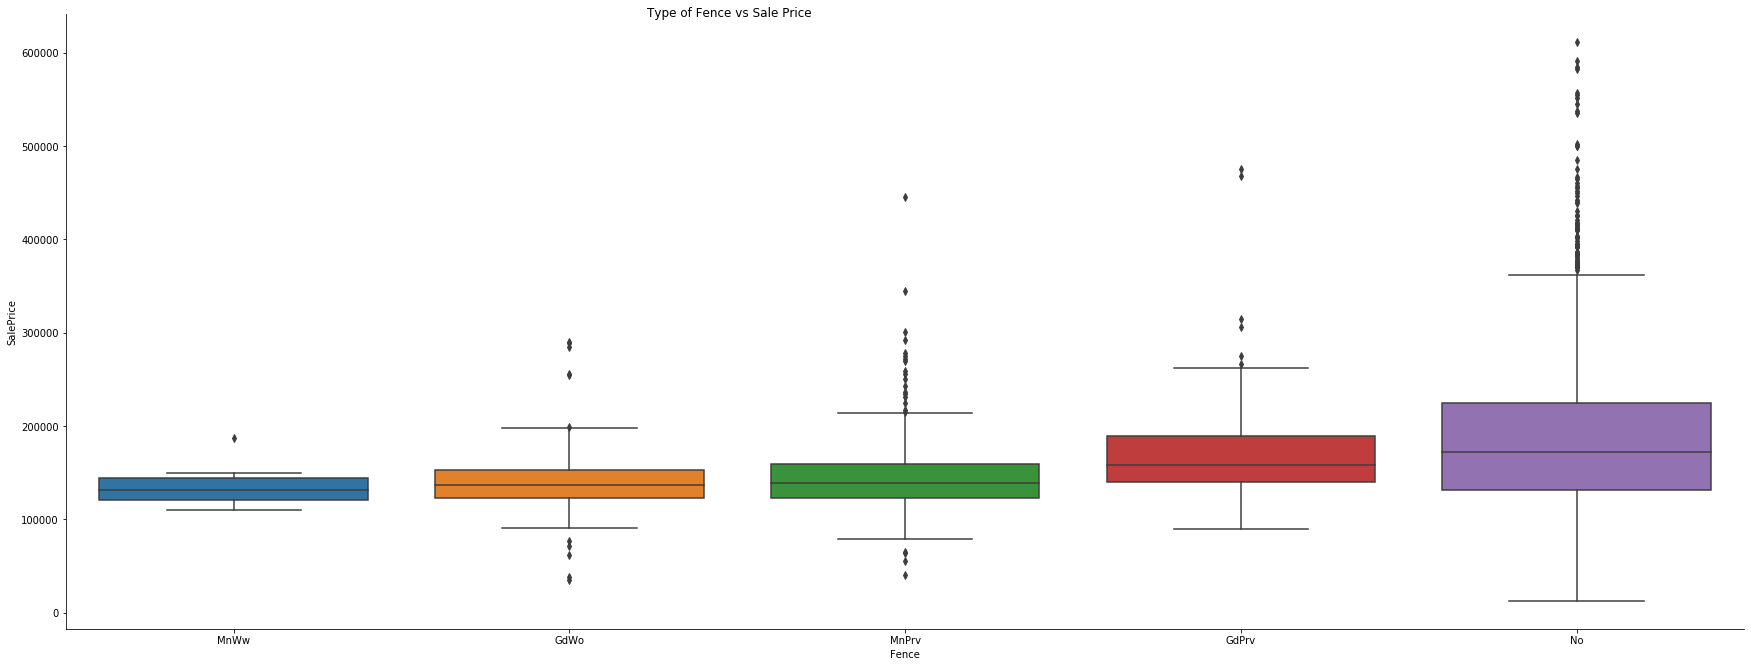

In [20]:
#Analysis of house exterior features

g = sns.catplot(x='Fence', y='SalePrice', kind='box',data=housing, order = housing.groupby('Fence').mean()['SalePrice'].sort_values().index);
g.fig.suptitle("Type of Fence vs Sale Price")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)

There is no correlation in between having a fence and sale price. 

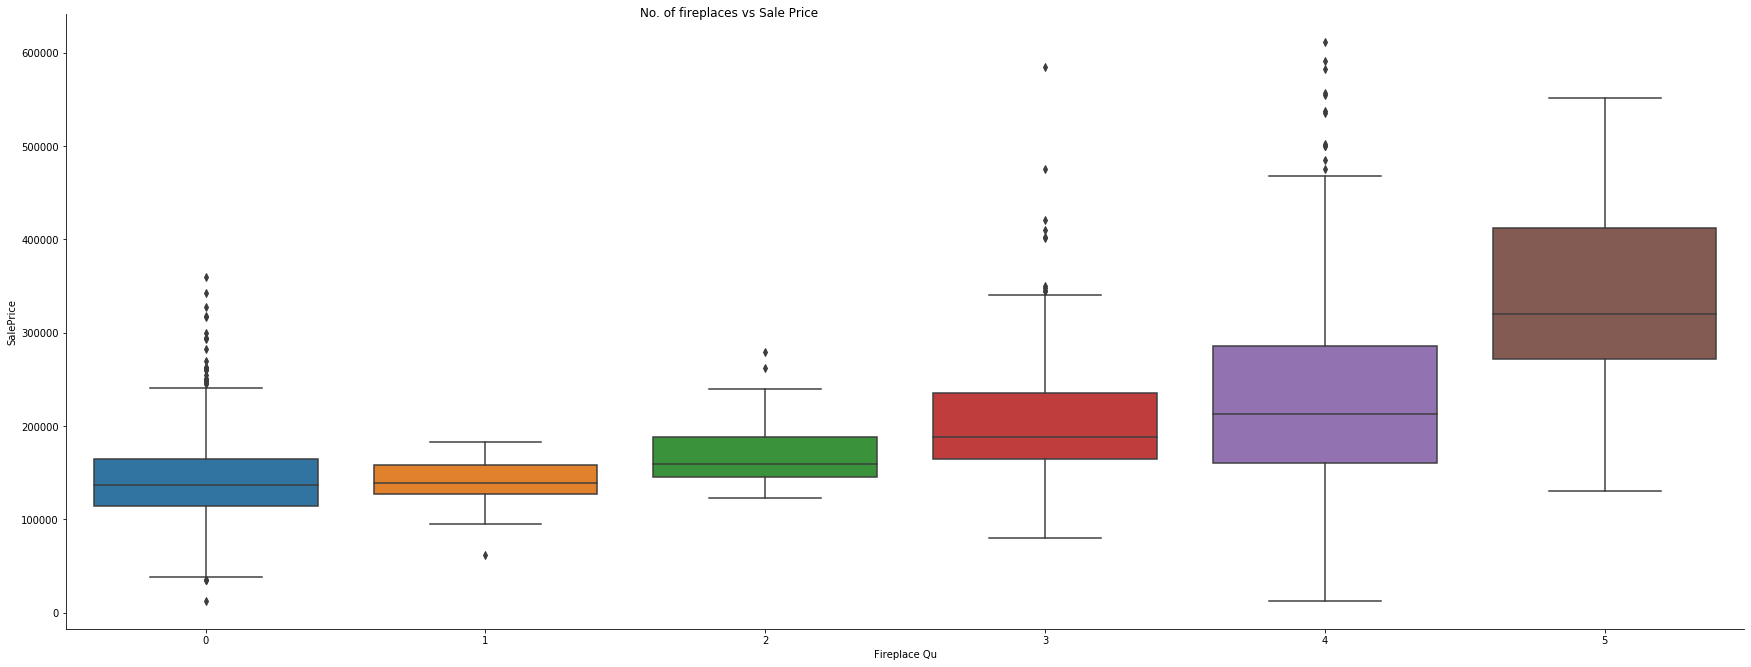

In [21]:
# Analysis of house interior features
g = sns.catplot(x='Fireplace Qu', y='SalePrice', kind='box',data=housing);
g.fig.suptitle("No. of fireplaces vs Sale Price")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)

There is a positive correlation with having a fireplace and sale price. The median sale price rises with the number of fire places.

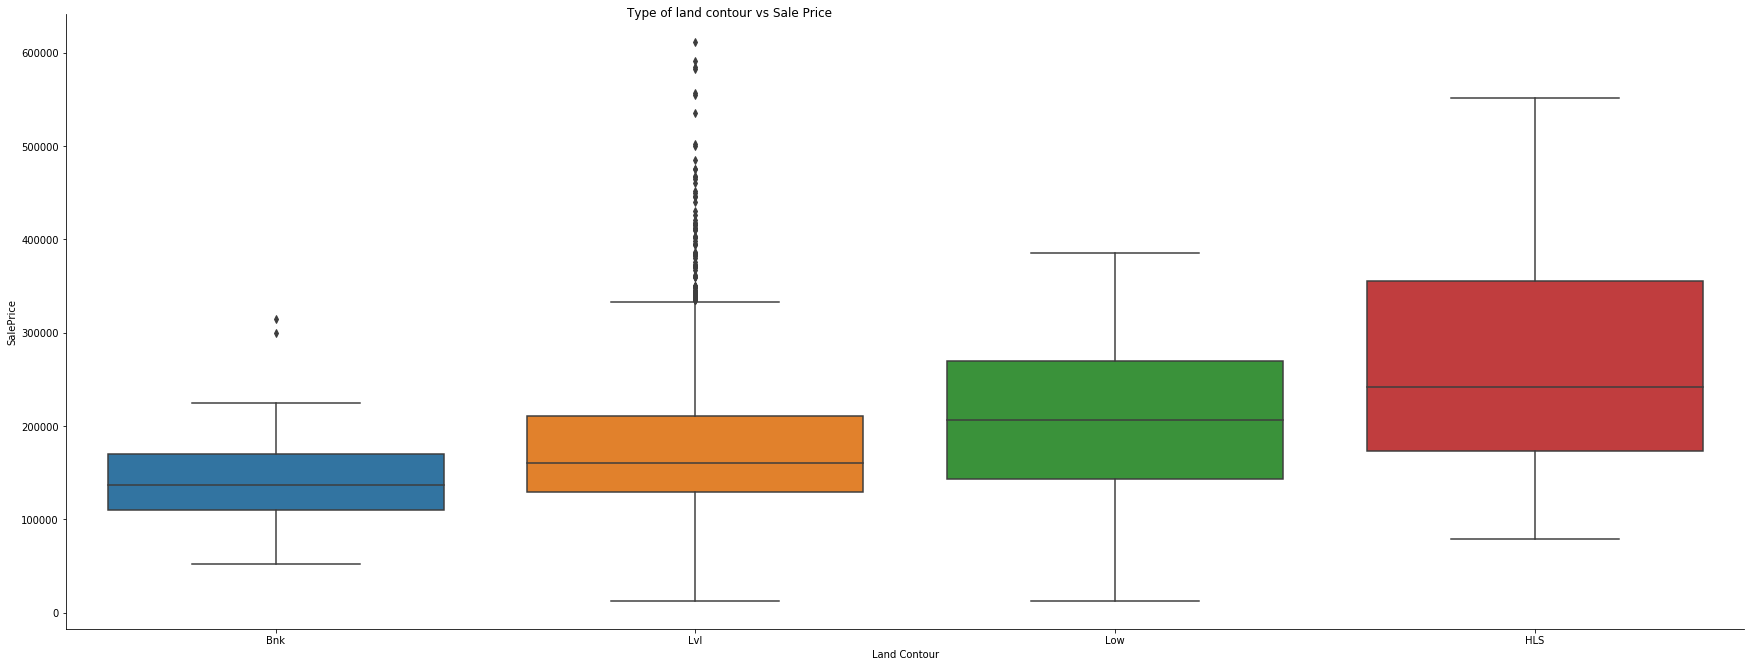

In [22]:
#Analysis of area features

g = sns.catplot(x='Land Contour', y='SalePrice', kind='box',data=housing,order = housing.groupby('Land Contour').mean()
                ['SalePrice'].sort_values().index);
g.fig.suptitle("Type of land contour vs Sale Price")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)

There is a correlation between land contour and sale price. Depending on the feature. Having the house on a hillside intuitively commands a higher sale price.

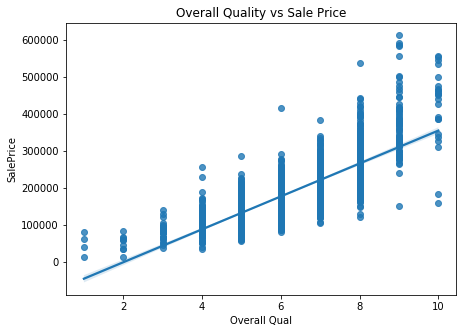

In [23]:
# Analysis of housing condition feature
plt.figure(figsize=(7,5))
sns.regplot(housing['Overall Qual'] ,housing['SalePrice']).set_title("Overall Quality vs Sale Price")
g.fig.suptitle("Overall Quality vs Sale Price");

There is a positive correlation between the overall quality of the house and sale price.

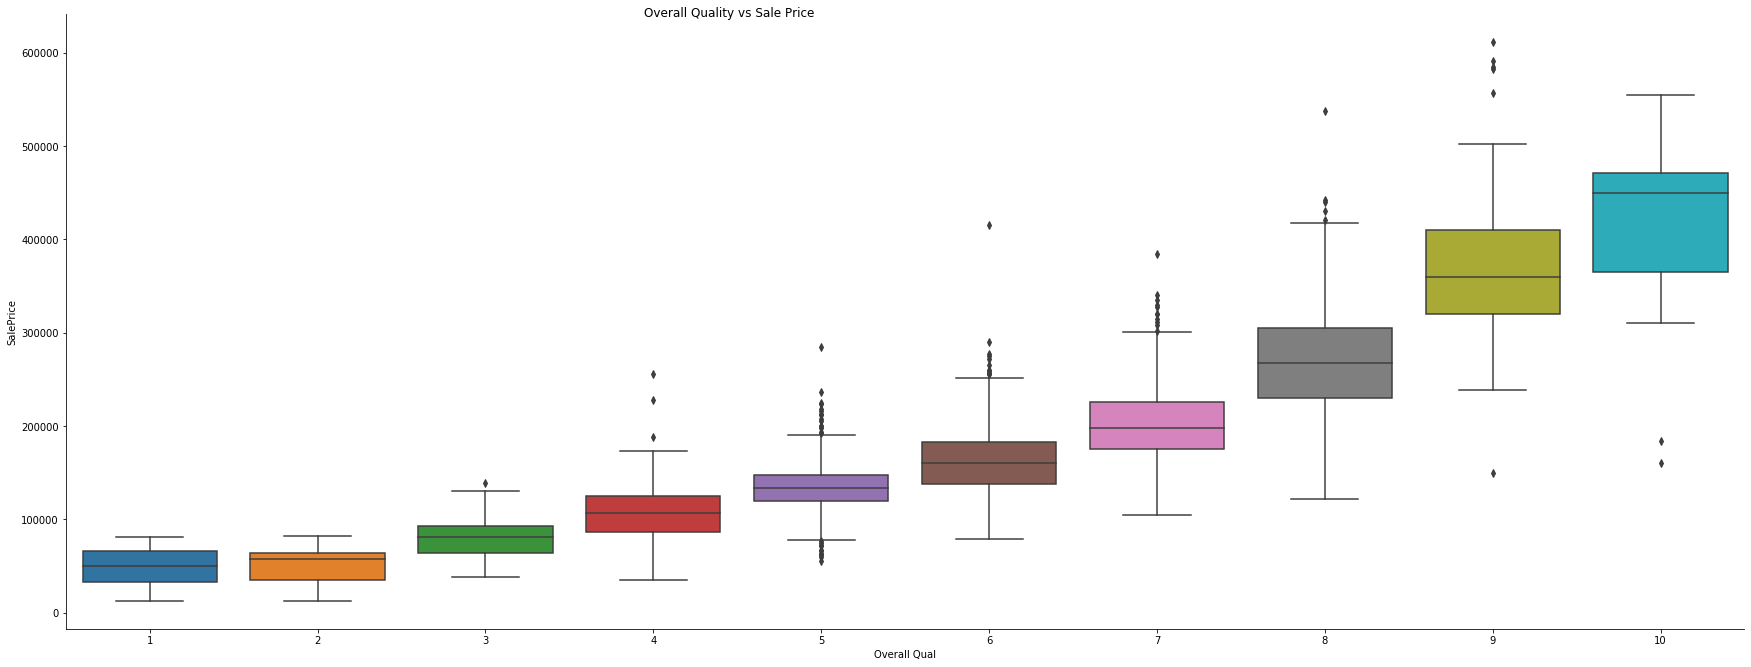

In [24]:
g = sns.catplot(x='Overall Qual', y='SalePrice', kind='box',data=housing);
g.fig.suptitle("Overall Quality vs Sale Price")

g.fig.set_figwidth(30)

g.fig.set_figheight(10)

The above box plot shows median sale price increasing with overall quality, showing a positive correlation

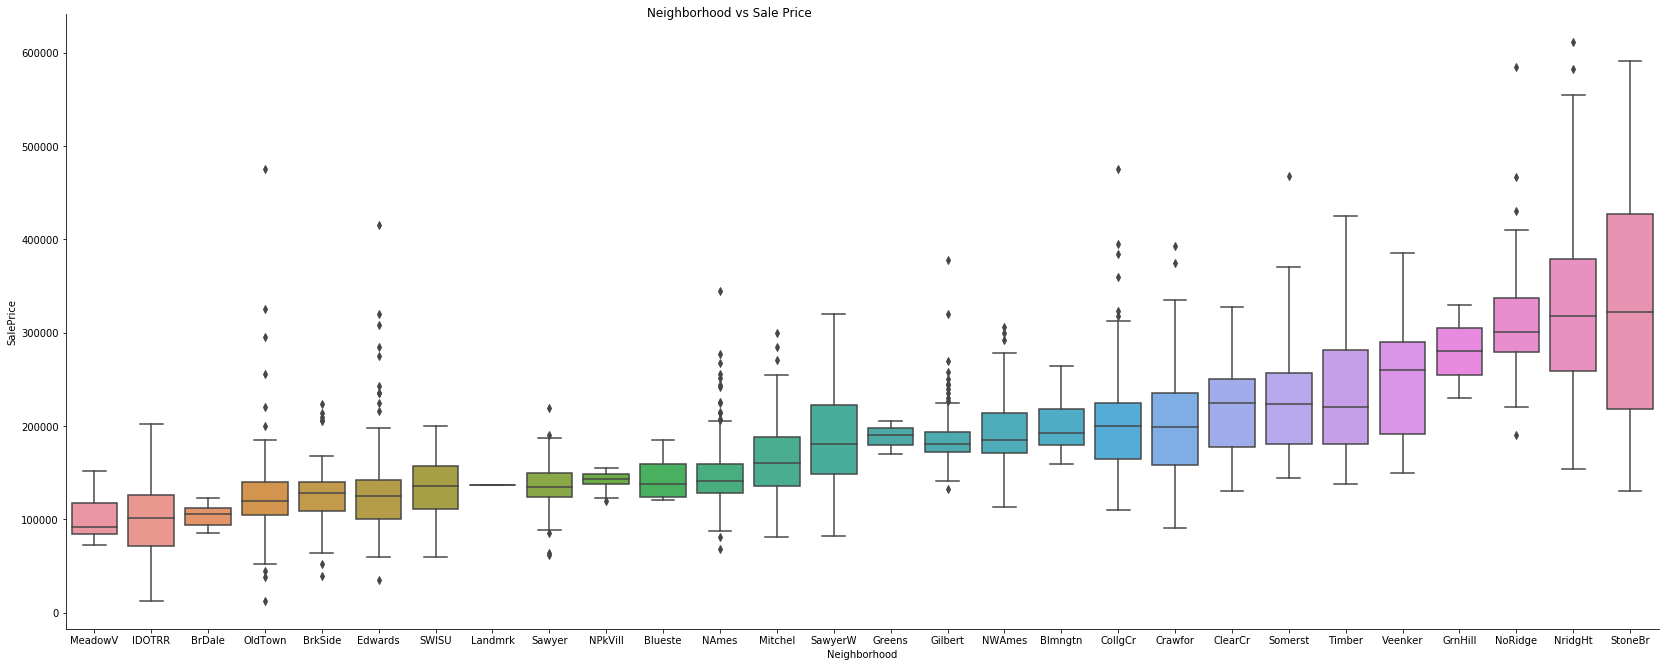

In [25]:
g = sns.catplot(x="Neighborhood", y="SalePrice", kind="box",data=housing,order = housing.groupby('Neighborhood').mean()
                ['SalePrice'].sort_values().index);
g.fig.suptitle("Neighborhood vs Sale Price")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)


The above boxplot shows a correlation between the neighborhood and sale price.

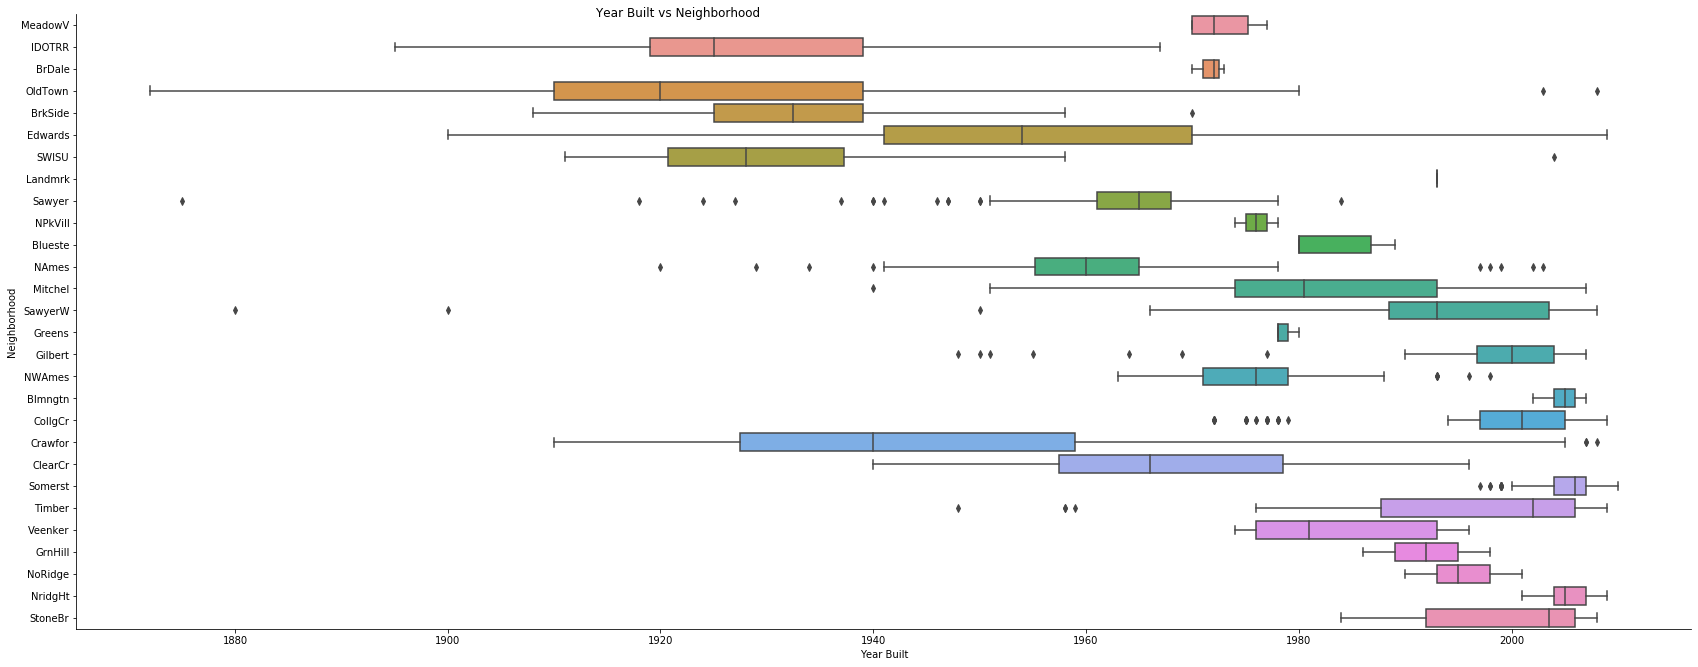

In [26]:
g = sns.catplot(x="Year Built", y="Neighborhood", kind="box",data=housing,order = housing.groupby('Neighborhood').mean()
                ['SalePrice'].sort_values().index);
g.fig.suptitle(" Year Built vs Neighborhood")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)

The above boxplot shows that the higher priced neighborhoods  were built the latest.

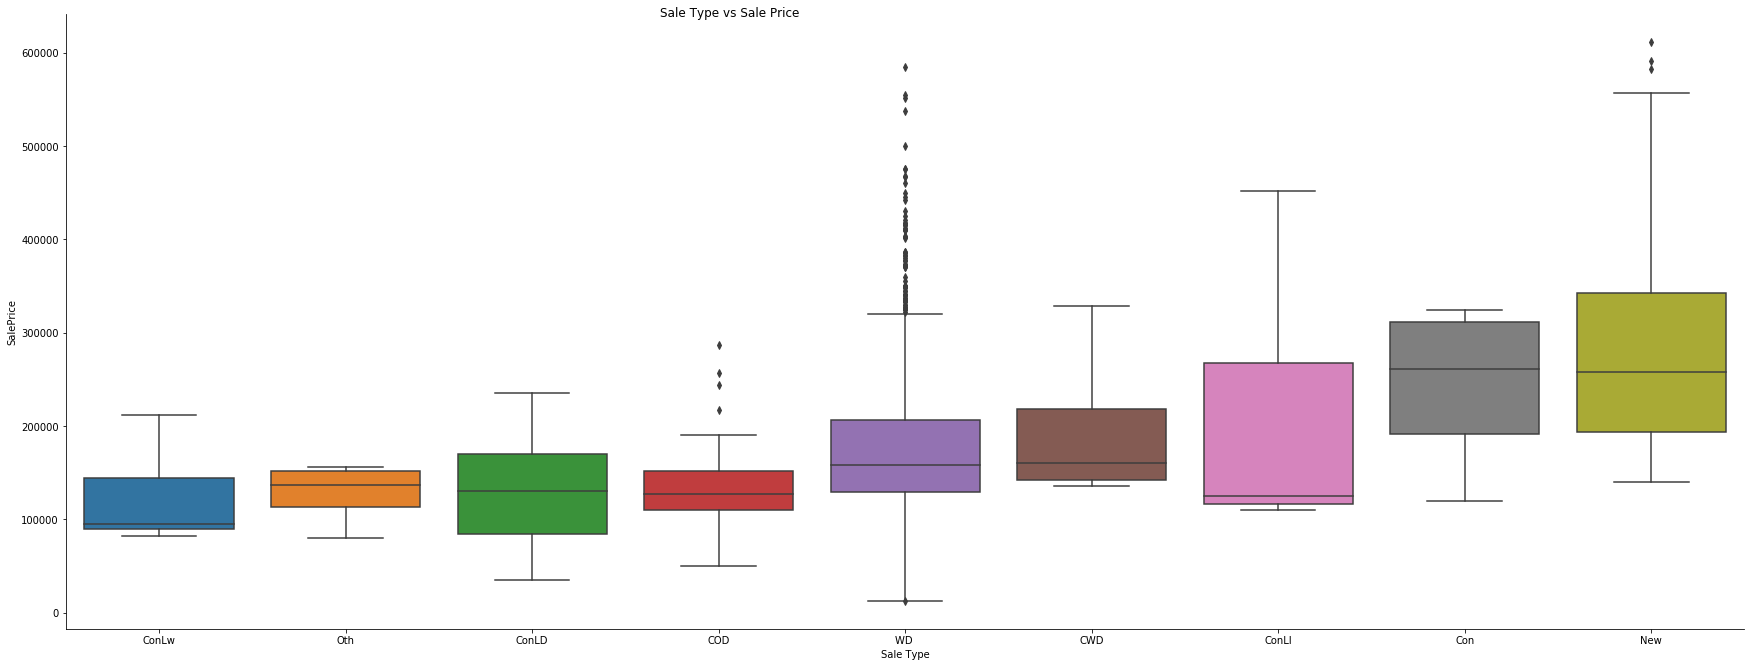

In [27]:
g = sns.catplot(x="Sale Type", y="SalePrice", kind="box",data=housing,order = housing.groupby('Sale Type').mean()
                ['SalePrice'].sort_values().index);
g.fig.suptitle("Sale Type vs Sale Price")
g.fig.set_figwidth(30)

g.fig.set_figheight(10)


The above boxplot shows that the newer constructed and sold houses have higher sale prices.

## Analaysis of a sample feature from each group leads to the following inference:

1) The newer the ages related features of the house, the higher the sale price

2) The better the conditions of the house , the higher the sale price

3) Sale price is influenced by location, in addition, the most of the higher priced neighborhoods are also the newest

4) The larger the house, the higher the sale price

5) The more housing interior features, the higher the sale price

6) Housing exterior do not seem to affect sale price

7) Area features do influence sale price, such as being on a hillside leads to higher sale price

8) Again the new sale type has higher sale price

9) The newness of the house is either correlated to alot of features or will have the largest impact on sale price


In [28]:
housing.to_csv('../datasets/housing.csv')